## Credit Card Customers - Predicting customer churn

## Objective
The objective here is to predict customer churn based on the customer information.

## Dataset Descriptions
The dataset is obtained from Kaggle. There are total of 10127 rows and 21 columns.
<br> <br>
Data fields:
- CLIENTNUM - Unique client identifier for customer
- Attrition_Flag - The target variable
- Customer_Age - The customer age
- Gender - The customer gender
- Dependent_count - Number of dependants of customer
- Education_Level - The education level of customer
- Marital_Status - The marital status of customer
- Income_Category - The income category of customer
- Card_Category - The card category of customer
- Months_on_book - The period of relationship of customer with bank
- Total_Relationship_Count - The total number of products held by customer with the bank
- Months_Inactive_12_mon - The number of inactive months in last 12 months
- Contacts_Count_12_mon - The number of contacts in the last 12 months
- Credit_Limit - The credit limit on the credit card of the customer
- Total_Revolving_Bal - The total revolving balance on the credit card of the customer
- Avg_Open_To_Buy - Average open to buy credit line of customer in last 12 months
- Total_Amt_Chng_Q4_Q1 - The change in transaction amount of customer
- Total_Trans_Amt - Total transaction amount of customer in last 12 months
- Total_Trans_Ct - Total transaction count of customer in last 12 months
- Total_Ct_Chng_Q4_Q1 - The change in transaction count of customer
- Avg_Utilization_Ratio - The average card utilization ratio of customer

***

## Import Libraries

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

## Read Dataset

In [116]:
df = pd.read_csv("./BankChurners.csv")

## Drop client number column

In [117]:
df = df.drop("CLIENTNUM", axis = 1)

## Characteristic and summary of dataset

In [118]:
df.shape

(10127, 20)

In [119]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Show the correlation chart of the dataset

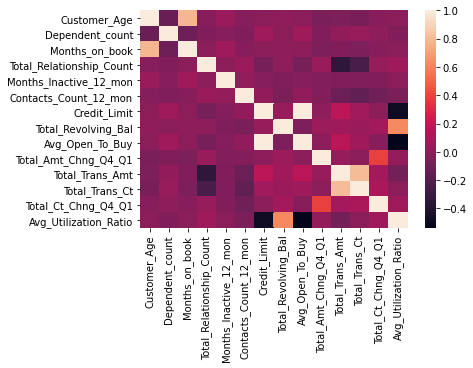

In [120]:
corr = df.corr()
sns.heatmap(corr)

## Data Cleaning

In [121]:
# Change target variable to 0 and 1
df["Attrition_Flag"] = [1 if i == "Attrited Customer" else 0 for i in df["Attrition_Flag"]]

In [122]:
# Check for NA
df.isna().any()

Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

## One-hot encoding

In [160]:
oh_df = pd.get_dummies(df.select_dtypes(include = "object"))
df = pd.concat([df.select_dtypes(exclude = "object"), oh_df], axis = 1)

In [161]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,1,0,0,0,1,0,0,0


## Data Modeling

In [177]:
# Separate dataframe into X and y
y = df.Attrition_Flag
X = df.drop("Attrition_Flag", axis = 1)

In [178]:
# Split dataframe into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

***
## Experiment with Random Forest Algorithm

In [179]:
# Initialize random forest classifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)

In [180]:
# Fit the dataframe to random forest classifier
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [181]:
# Predict on the test data
y_pred = rf.predict(X_test)

In [182]:
# Compare the result
result = pd.DataFrame(list(zip(y_test, y_pred)), columns = ["Actual", "Predicted"])
result.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


In [183]:
# Calculate the accuracy
accuracy_score(y_test, y_pred)

0.9585389930898321

In [184]:
# Check the confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=['true:{}'.format(x) for x in y_test.unique().tolist()], 
             columns=['pred:{}'.format(x) for x in y_test.unique().tolist()])

,pred:0,pred:1
true:0,1676,19
true:1,65,266


In [185]:
# Calculate the recall score
recall_score(y_test, y_pred)

0.8036253776435045

***
## Experiment with XGBoost Algorithm

In [186]:
import xgboost as xgb

In [187]:
xgb_class = xgb.XGBClassifier()

In [188]:
xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [189]:
y_pred = xgb_class.predict(X_test)

In [190]:
accuracy_score(y_test, y_pred)

0.9723593287265548

In [191]:
# Check the confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=['true:{}'.format(x) for x in y_test.unique().tolist()], 
             columns=['pred:{}'.format(x) for x in y_test.unique().tolist()])

,pred:0,pred:1
true:0,1673,22
true:1,34,297


In [192]:
# Calculate the recall score
recall_score(y_test, y_pred)

0.8972809667673716

# Conclusion
Based on the experiment done, XGBoost is more superior than Random Forest on this dataset. XGBoost managed to have higher accuracy over Random Forest (97.24% over 95.85%) and also having higher recall score (0.89 over 0.8). It is crucial to have higher recall score in this experiment because bank is able to capture higher number of "Churn" customer and intervene to retain the customer whereas if precision score is higher, bank will be wasted more money on retaining customer that are unlikely to churn.